In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import collections

In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
for i in df.columns:
  print(i,df[i].dtypes)

age int64
job object
marital object
education object
default object
housing object
loan object
contact object
month object
day_of_week object
duration int64
campaign int64
pdays int64
previous int64
poutcome object
emp.var.rate float64
cons.price.idx float64
cons.conf.idx float64
euribor3m float64
nr.employed float64
y object


In [4]:
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
categoric_features = [i for i in df.columns if i not in numeric_features]
categoric_features.remove('y')

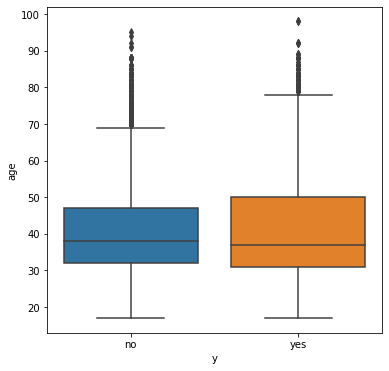

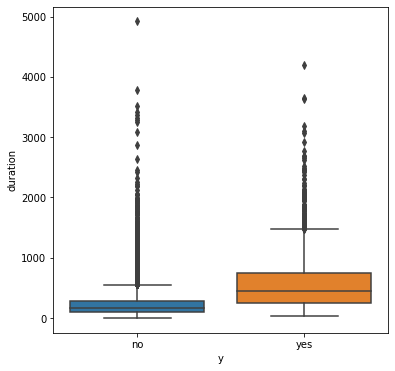

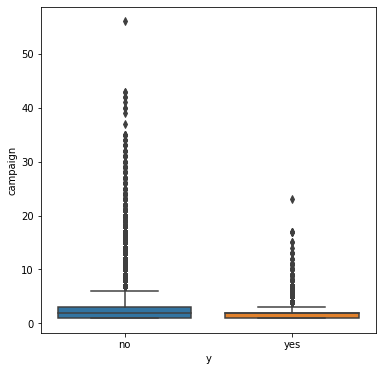

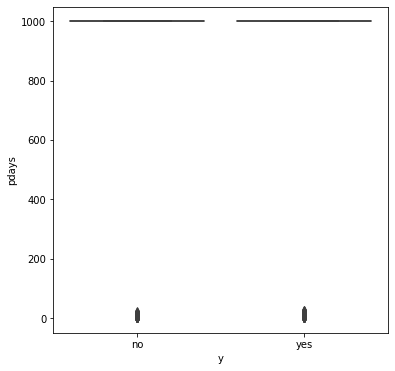

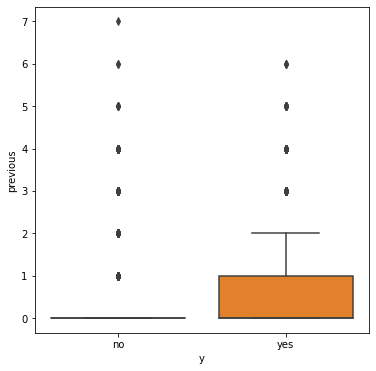

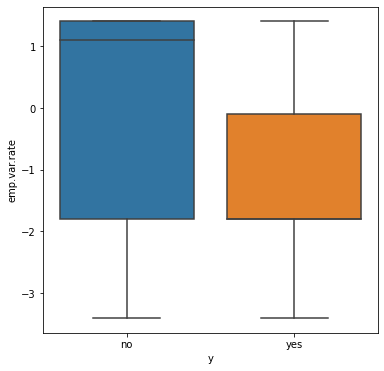

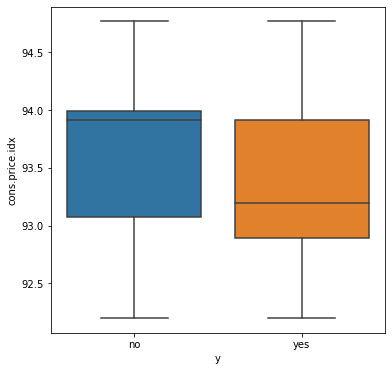

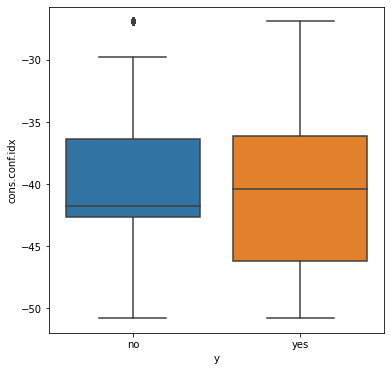

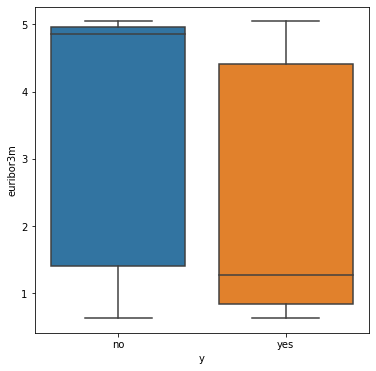

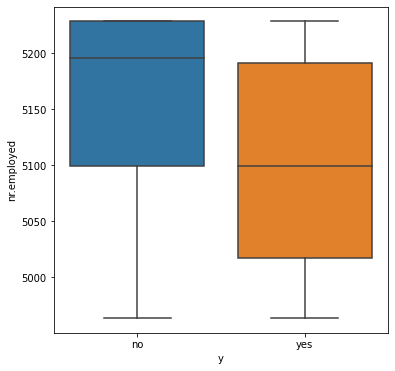

In [17]:
for i in numeric_features:
  plt.figure(figsize=(6,6))
  sns.boxplot(x=df['y'],y=df[i])
  plt.show()

Age is quite same for both results thus we can't consider this to be a seperator related to our classification task.

Previous attribute has quite a bit of information.

age


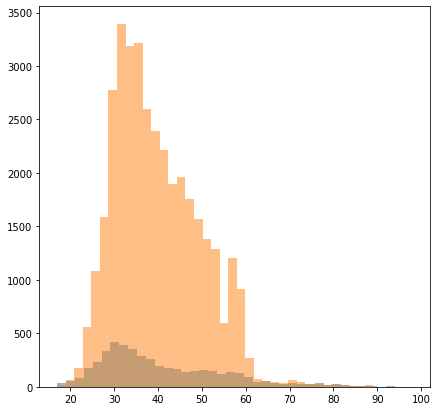

duration


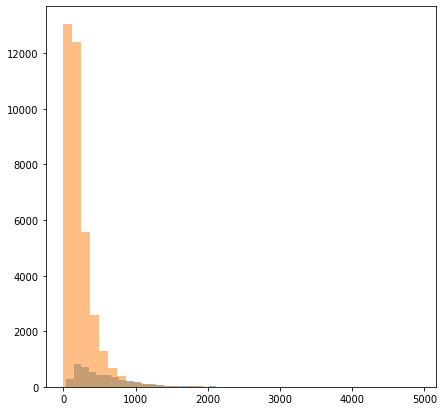

campaign


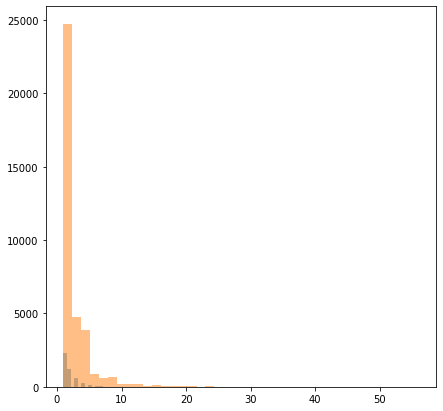

pdays


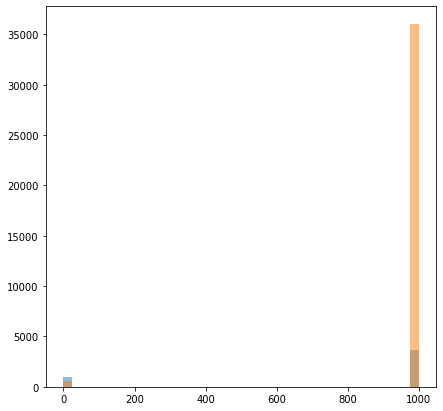

previous


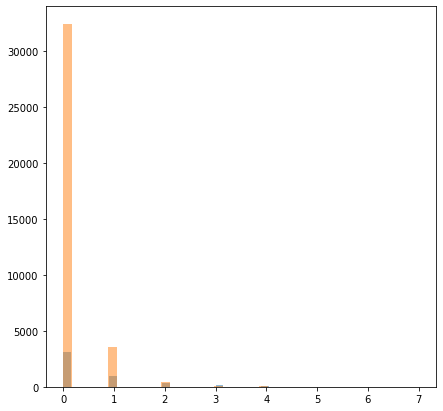

emp.var.rate


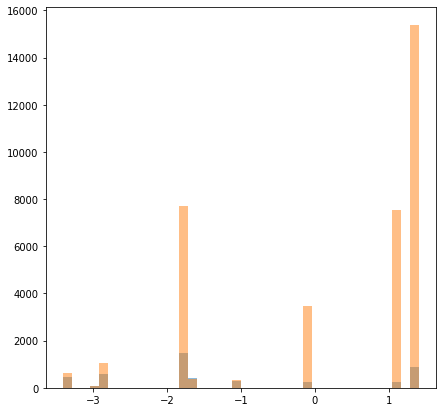

cons.price.idx


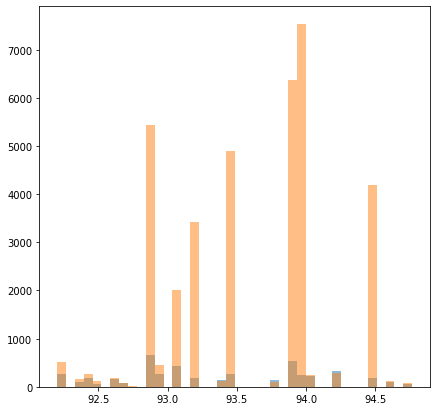

cons.conf.idx


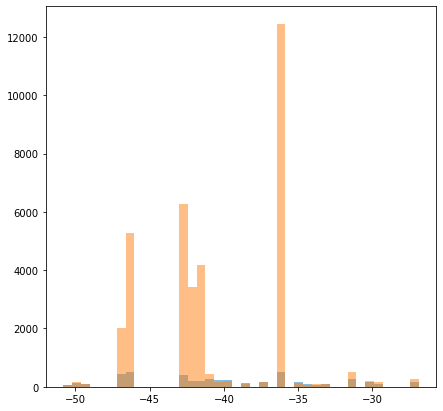

euribor3m


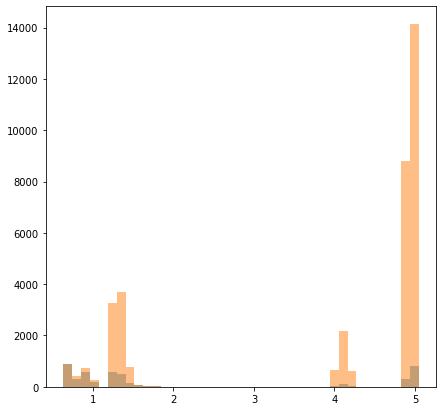

nr.employed


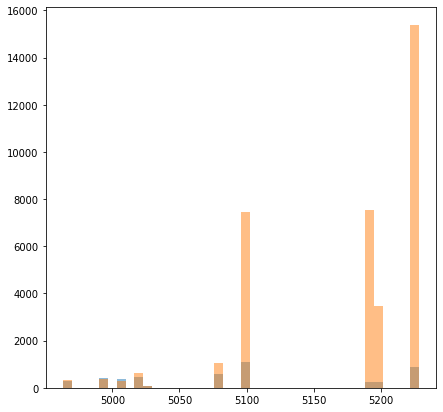

In [18]:
bins = 40
for i in numeric_features:
  plt.figure(figsize=(7,7))
  plt.hist(df[df['y']=='yes'][i].values,bins,alpha=0.5,label='yes')
  plt.hist(df[df['y']=='no'][i].values,bins,alpha=0.5,label='no')
  print(i)
  plt.show()

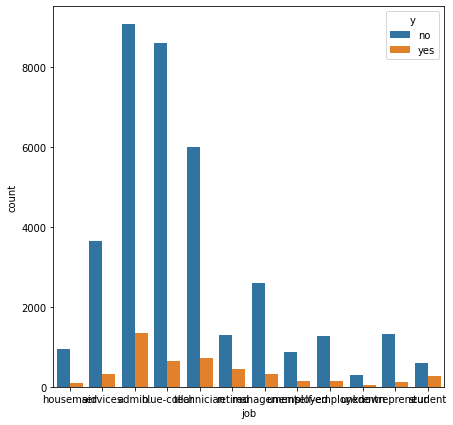

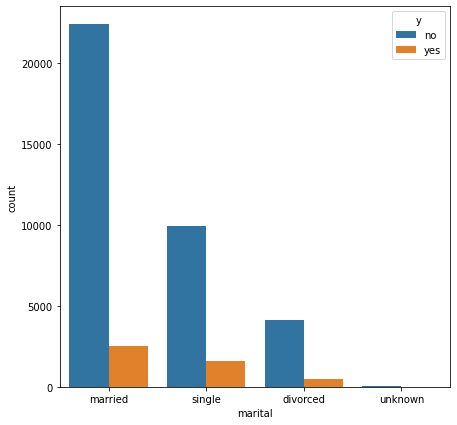

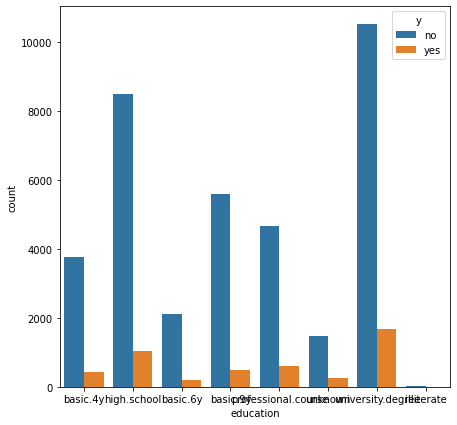

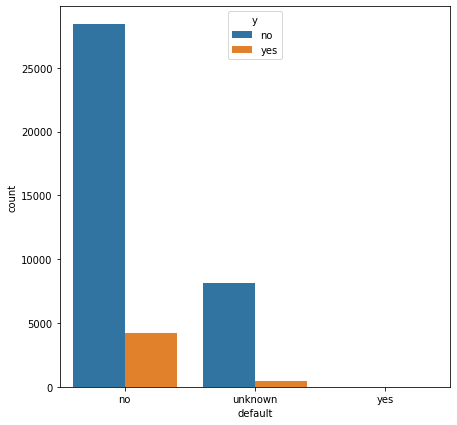

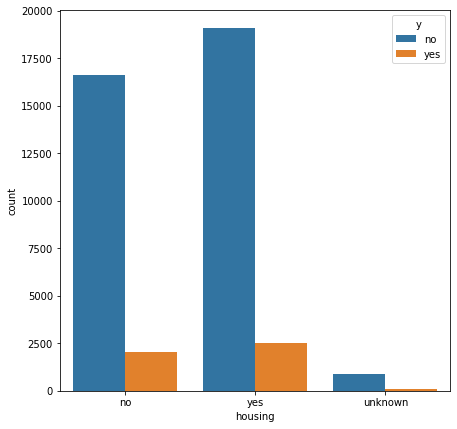

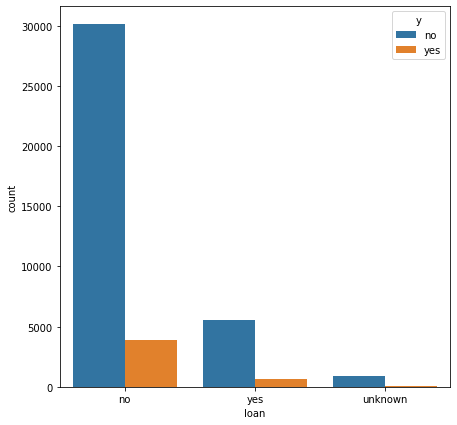

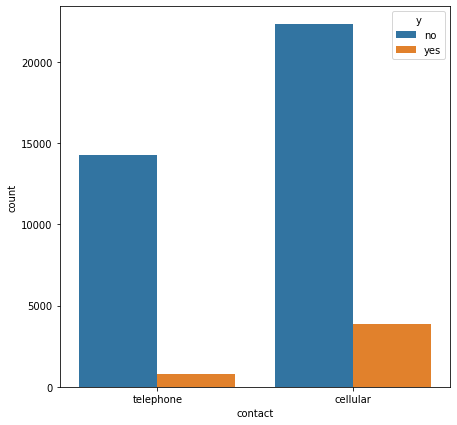

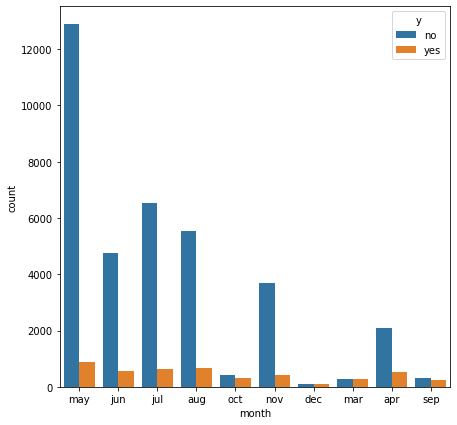

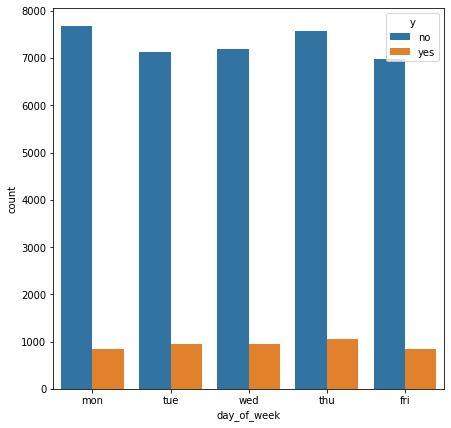

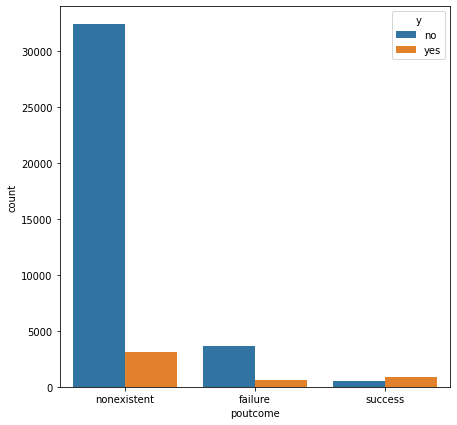

In [19]:
for i in categoric_features:
  plt.figure(figsize=(7,7))
  sns.countplot(x=df[i],hue=df['y'])
  plt.show()

One hot encoding for Categorical values

In [7]:
for i in categoric_features:
  df=pd.concat([df,pd.get_dummies(df[i],prefix=i)],axis=1)

In [9]:
df=df.drop(categoric_features,axis=1)
df=df.drop('pdays',axis=1)
numeric_features.remove('pdays')

In [10]:
df.head(10)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
5,45,198,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
6,59,139,1,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7,41,217,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
8,24,380,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
9,25,50,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


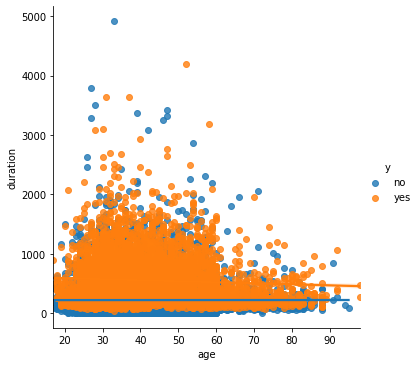

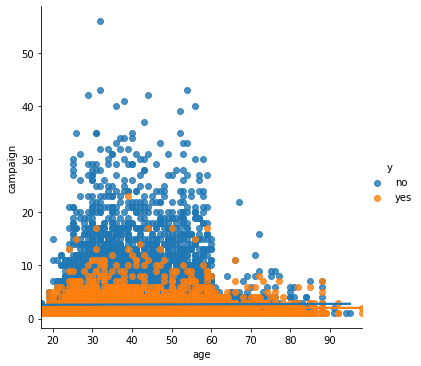

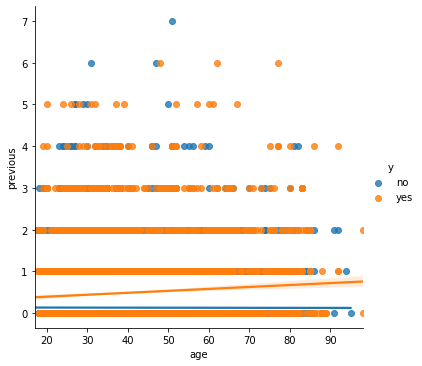

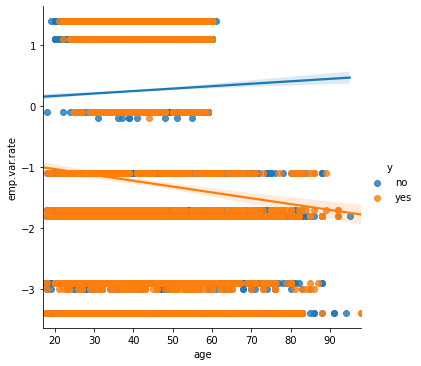

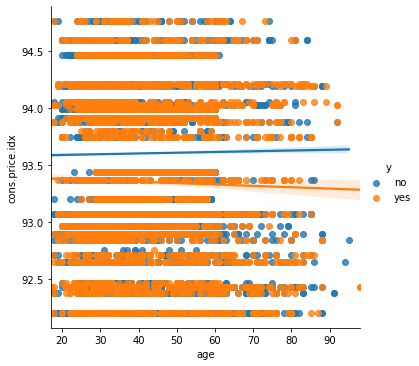

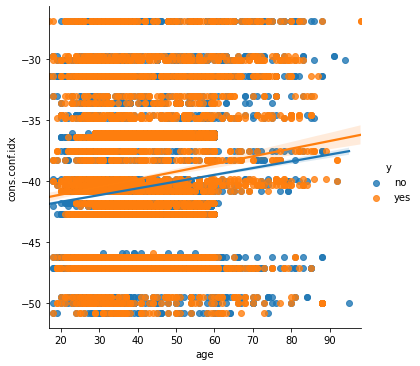

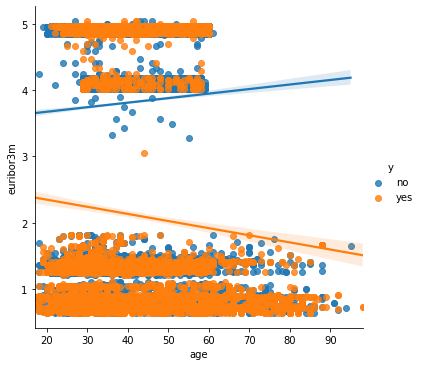

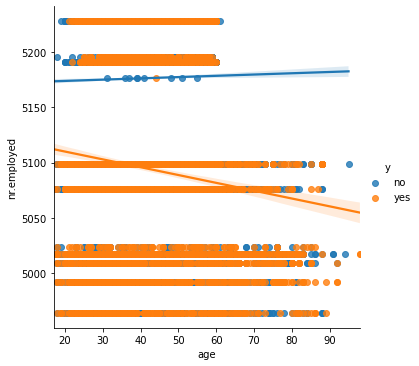

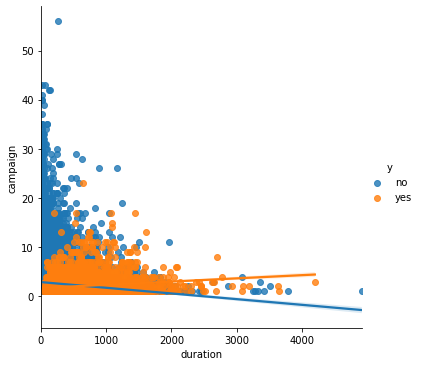

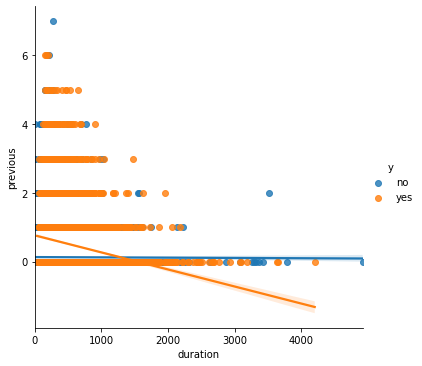

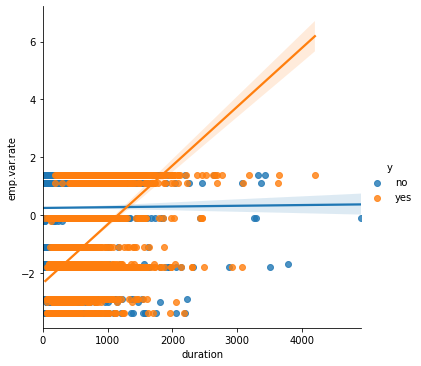

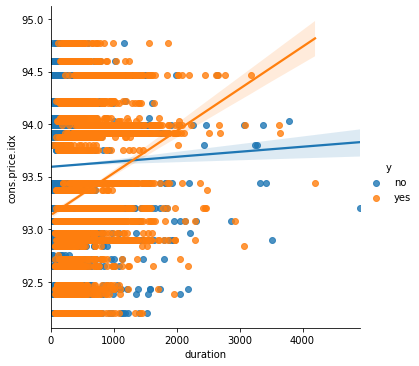

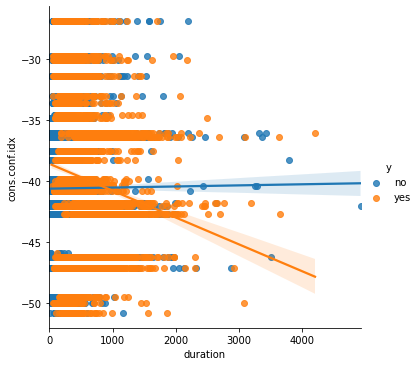

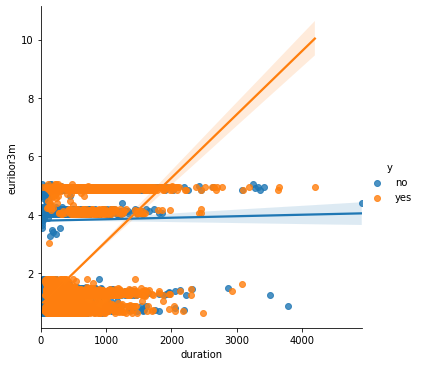

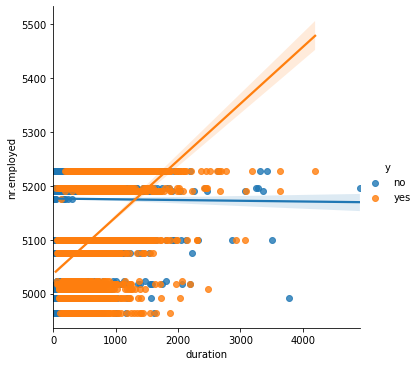

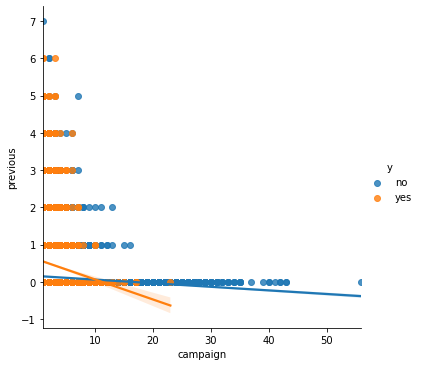

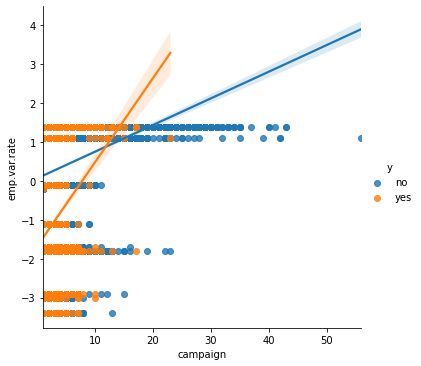

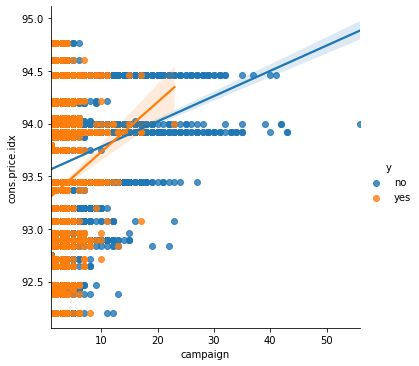

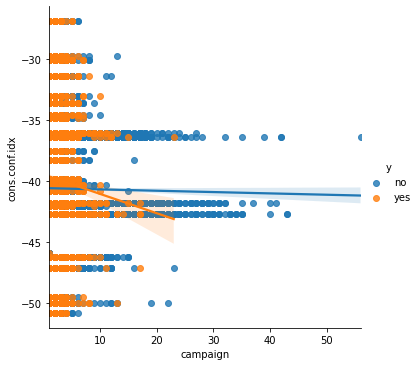

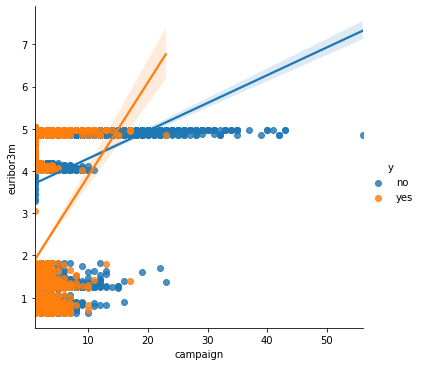

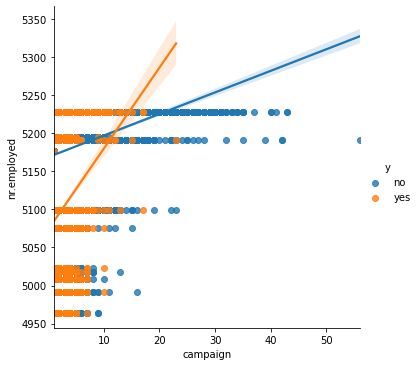

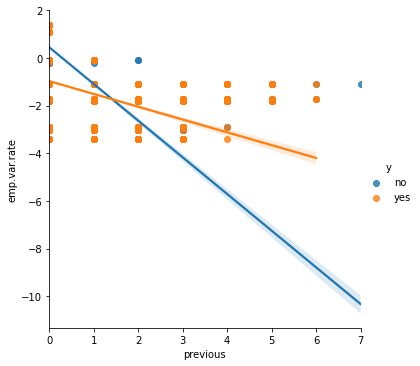

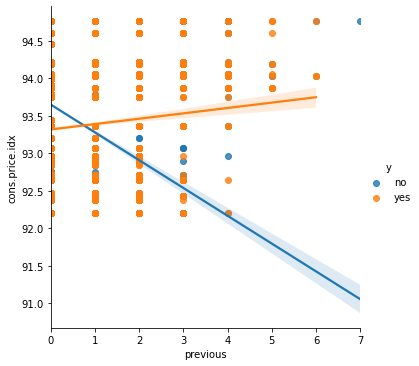

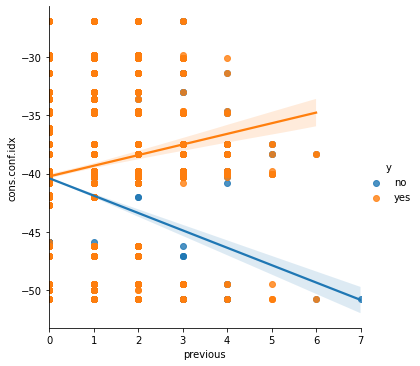

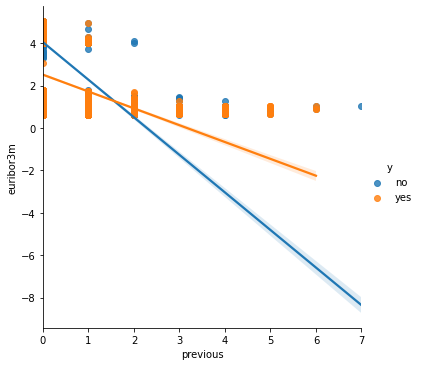

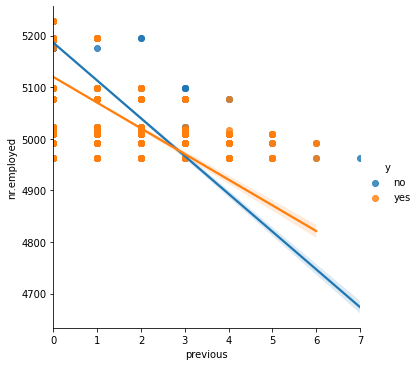

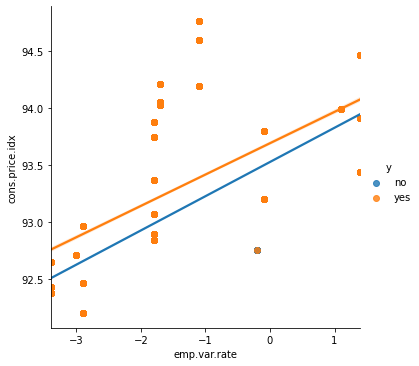

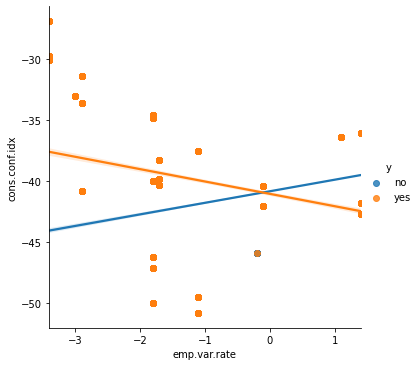

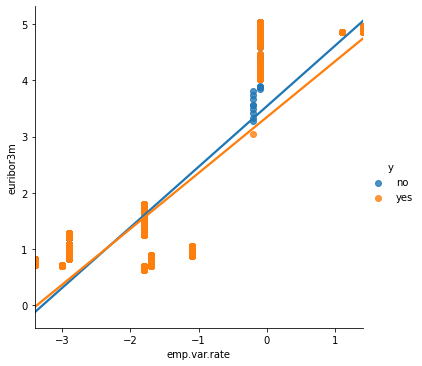

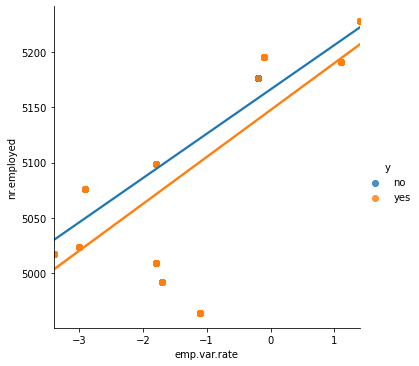

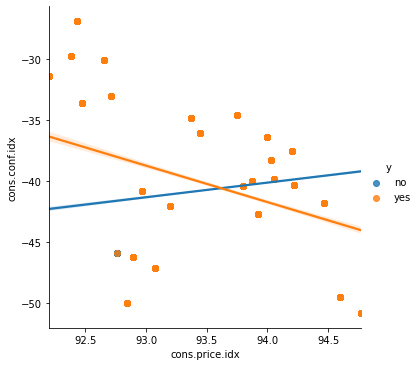

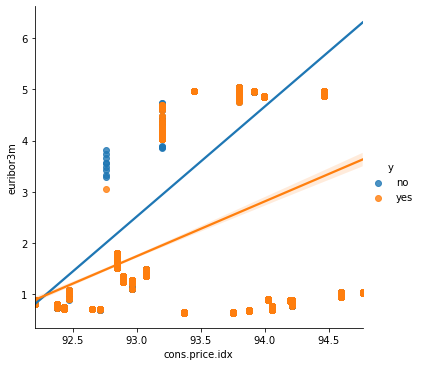

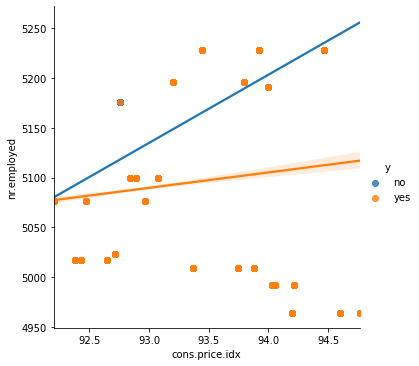

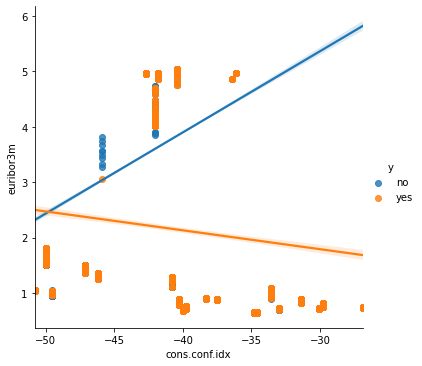

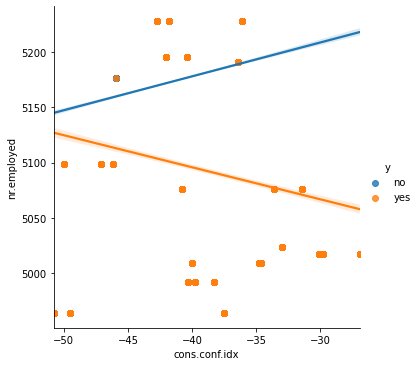

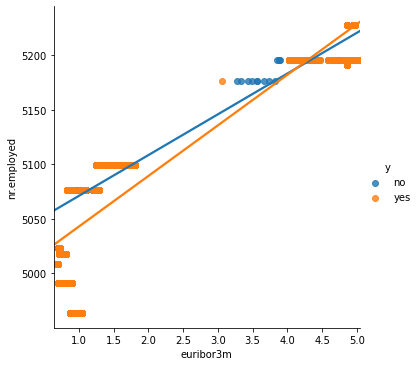

In [11]:
for i in range(len(numeric_features)):
  for j in range(i+1,len(numeric_features)):
    sns.lmplot(x=numeric_features[i],y=numeric_features[j],data=df,hue='y')
    plt.show()

campaign,age,previous,duration,emp.var.rate are the attributes which have a clear decision boundary

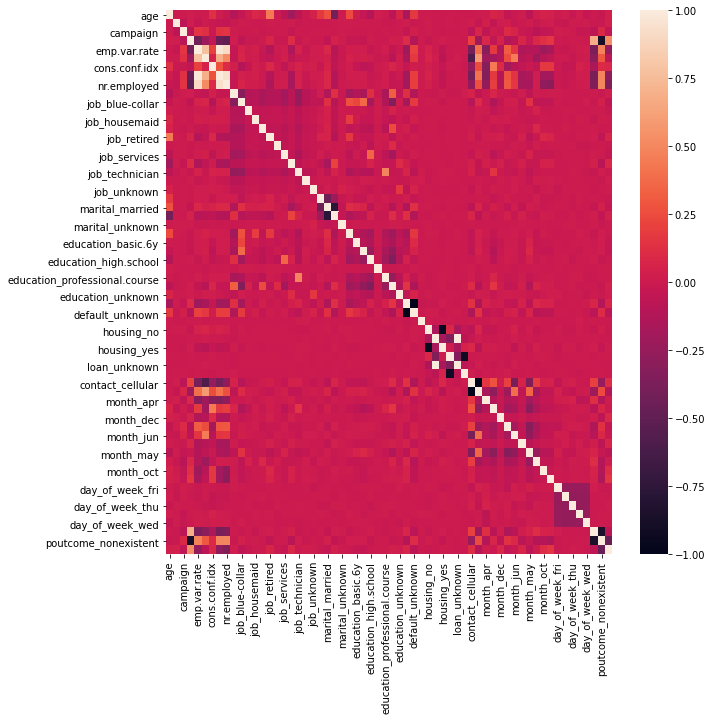

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()


The black parts and the white parts shows the most correlated parts

In [14]:
df['y']=[1 if i=="yes" else 0 for i in df["y"]]
y=df['y']
X=df.drop('y',axis=1)

[7.54938038e-02 2.22479671e-01 5.54877152e-02 1.17468800e-02
 3.23380344e-02 1.57386695e-02 1.80370943e-02 7.36380154e-02
 3.67199788e-02 1.50206736e-02 9.91140896e-03 4.74984011e-03
 3.86310537e-03 8.09023537e-03 7.59909807e-03 5.30476099e-03
 7.52467302e-03 5.52648314e-03 1.23336844e-02 4.78377147e-03
 2.13930743e-03 8.97557694e-03 1.41223456e-02 1.26020325e-02
 6.86030494e-04 7.04525096e-03 5.56761743e-03 9.61735659e-03
 1.39643469e-02 2.28108464e-04 1.04003670e-02 1.43108524e-02
 6.31083473e-03 6.61329641e-03 6.17108745e-03 8.43882582e-07
 1.68142857e-02 2.20911121e-03 1.70921719e-02 1.16935872e-02
 2.40914367e-03 1.14161336e-02 7.86996264e-03 7.78195339e-03
 5.06835063e-03 2.76849101e-03 1.21857555e-03 3.21911051e-03
 3.94869624e-03 6.16947801e-03 1.17791383e-02 4.03609886e-03
 7.22526439e-03 3.88234569e-03 1.26851560e-02 1.34908373e-02
 1.35798818e-02 1.27355702e-02 1.30057168e-02 1.27375749e-02
 1.24091555e-02 3.76113572e-02]


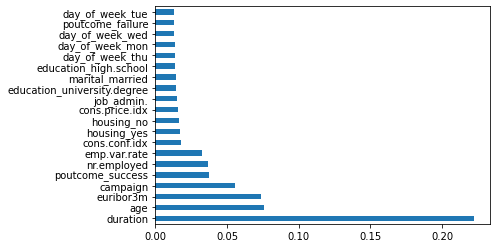

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)#using inbuilt class features_importances_ from tree classifier
#plot graphs of top 20 feature instances for better visualization
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

Taking only top 20 features.

we get that most of the numeric variables that we used were giving the best results

In [21]:
X = df[feat_importances.nlargest(20).index.values]

In [23]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components = 2).fit_transform(X)
print(X_embedded)

[[ -8.400008  13.475172]
 [-24.350437 -56.405056]
 [-28.748096  -9.606652]
 ...
 [ -9.912832  75.908356]
 [-34.51449   36.176235]
 [-13.047145  73.73476 ]]


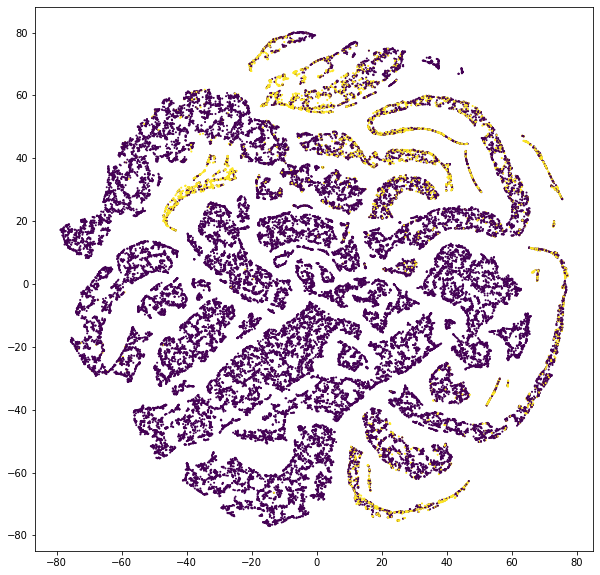

In [27]:
s=[1]*len(X_embedded[:,0])
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y.values,s=s)
plt.show()

In [28]:
#we can use knn classifier in this tsne results variables..
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#split dataset into train and test data according to stratification..
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size=0.2, random_state=1, stratify=y)

In [30]:
#fitting the model and predictions on the test data..
from sklearn.metrics import accuracy_score

for i in range(10,400,10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    print(i,accuracy_score(neigh.predict(X_test),y_test))

10 0.9056809905316825
20 0.9054382131585337
30 0.9089584850691915
40 0.9088370963826171
50 0.9101723719349356
60 0.9100509832483612
70 0.9102937606215101
80 0.909686817188638
90 0.9087157076960427
100 0.9083515416363195
110 0.9087157076960427
120 0.907016266084001
130 0.9060451565914057
140 0.9060451565914057
150 0.9049526584122359
160 0.9045884923525127
170 0.9039815489196407
180 0.9039815489196407
190 0.9043457149793639
200 0.9037387715464918
210 0.9032532168001942
220 0.9030104394270454
230 0.9013109978150037
240 0.9013109978150037
250 0.9007040543821316
260 0.9021607186210245
270 0.9039815489196407
280 0.9036173828599174
290 0.9030104394270454
300 0.9036173828599174
310 0.9031318281136198
320 0.9032532168001942
330 0.902889050740471
340 0.9025248846807478
350 0.9024034959941734
360 0.902889050740471
370 0.9015537751881525
380 0.9015537751881525
390 0.9015537751881525


In [31]:
# we can do oversampling on the non tsne X to get a balanced result..
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = .1,
                                                  random_state=12)

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics
#applying smote for oversampling...
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [35]:
print('Validation Results')
print(clf_rf.score(x_val, y_val))
print(recall_score(y_val, clf_rf.predict(x_val)))

Validation Results
0.9089584850691915
0.5496688741721855


XG boost model

In [58]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['y'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['y'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print(metrics.classification_report(dtrain['y'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['y'], dtrain_predprob))
    x=list(df_res.columns)
    x.remove('y')
    feat_imp = pd.Series(alg.feature_importances_,index=x).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()

In [44]:
predictors = [x for x in df_select.columns if x not in ['y']]
df_res=pd.DataFrame(x_train_res,columns=predictors)
df_res["y"]=y_train_res

[0]	train-logloss:0.632042+0.000980913	test-logloss:0.632334+0.000898717
[1]	train-logloss:0.580211+0.0035697	test-logloss:0.580838+0.00382532
[2]	train-logloss:0.537017+0.0024047	test-logloss:0.537961+0.00239324
[3]	train-logloss:0.498059+0.0014387	test-logloss:0.499136+0.00178674
[4]	train-logloss:0.464458+0.0022645	test-logloss:0.465825+0.00240146
[5]	train-logloss:0.434836+0.0019288	test-logloss:0.436375+0.0019722
[6]	train-logloss:0.410171+0.00115625	test-logloss:0.41166+0.00125702
[7]	train-logloss:0.387706+0.00126498	test-logloss:0.389313+0.00136626
[8]	train-logloss:0.367434+0.00193353	test-logloss:0.369197+0.00190039
[9]	train-logloss:0.348263+0.00198803	test-logloss:0.350125+0.00190911
[10]	train-logloss:0.331921+0.00152596	test-logloss:0.333957+0.00178185
[11]	train-logloss:0.31673+0.00134284	test-logloss:0.318962+0.00125322
[12]	train-logloss:0.302908+0.00200672	test-logloss:0.305278+0.00147773
[13]	train-logloss:0.290039+0.0032008	test-logloss:0.292364+0.0023932
[14]	train

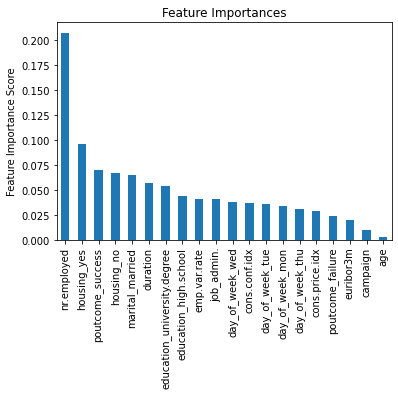

In [59]:
#Choose all predictors and perform cross-validation to select hyperparameters
xgb1= XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, df_res, predictors)

The f1 score is significantly larger than the random forest classifier.We get a good result with XGBOOST model and oversampling.



**Recommendations to marketing and analysis team:**


[Cons.Price.Idx,Cons.Conf.Idx] Recommendations 1.Collaborate with the economic experts 2.Be a fast mover capture customers before the competitiors capture them.

[Age, Married] Recommendations 1.Target middle aged and married people. 2.Convey peace of mind,safe investment,steady income source as the value proposition.

[Duration,Mode of Contact :Telephone] Recommendations 1.Try to engage customers and have longer calls. 2.Preferably use telephones as the mode of contact.

[Campaign] 1.Prioritize those customers who were part of the previous marketing campaign.